<div style="text-align: center;">
  <img src="https://github.com/Hack-io-Data/Imagenes/blob/main/01-LogosHackio/logo_naranja@4x.png?raw=true" alt="esquema" />
</div>

# Laboratorio Visualización

En este laboratorio usaremos el DataFrame de Netflix completo creado en los primeros laboratorios de Pandas. 

**Instrucciones:**

1. Lee cuidadosamente el enunciado de cada ejercicio.

2. Implementa la solución en la celda de código proporcionada.

3. Debes incluir después de cada gráfica la interpretación de las mismas en una celda de markdown. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None) # para poder visualizar todas las columnas de los DataFrames

In [2]:
# Carga el dataset de trabajo

#df = pd.read_csv('netflix_titles.csv')
df = pd.read_csv('combined_netflix.csv')
df.drop('Unnamed: 0', axis = 1, inplace = True)

In [3]:
df.sample()

,Genre,Runtime,IMDB Score,Language,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
5371,NaN,NaN,NaN,NaN,Movie,Aditi Mittal: Things They Wouldn't Let Me Say,Fazila Allana,Aditi Mittal,India,"July 18, 2017",2017,TV-MA,63 min,Stand-Up Comedy,Trailblazing comic Aditi Mittal mixes topical ...


#### Ejercicio 1: ¿Cuántos títulos por tipo (Películas vs Series) tenemos?. En esta gráfica deberás: 

- Incluir un título. 

- Cambiar el nombre de los ejes X e Y. 

- Cambiar el color de las barras. 

/var/folders/gf/rtshnkx974q994djpf858hv40000gn/T/ipykernel_11810/3212641835.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x = 'type',


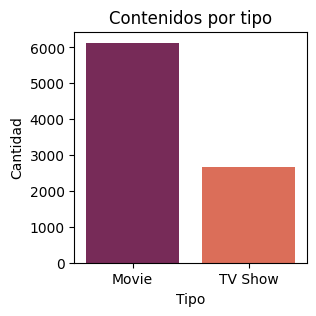

In [4]:
plt.figure(figsize = (3, 3))

sns.countplot(x = 'type',
              data = df,
              palette='rocket')

plt.title('Contenidos por tipo', fontsize = 12)
plt.xlabel('Tipo')
plt.ylabel('Cantidad')
plt.show()

#### Ejercicio 2: ¿Cuál es la distribución de calificaciones (rating) en los títulos? En esta gráfica deberás:

- Mostrar los resultados ordenados de mayor a menor. 

- Rotar las etiquetas del eje X. 

- Quitar el nombre del eje X. 

- Cambiar el nombre del ehje Y. 

- Ponerle título a la gráfica. 



In [5]:
# Limpio todo el dataframe
# Quito los NaN y XX min de rating (los buenos son los únicos que contienen A-Z)
filtro_rating = df['rating'].str.contains(r'[A-Z]', na=False)
# Lo guardo aquí
df_clean = df[(filtro_rating)]

In [6]:
df_ratings = df_clean['rating'].value_counts().reset_index()

/var/folders/gf/rtshnkx974q994djpf858hv40000gn/T/ipykernel_11810/2414899715.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = 'rating',


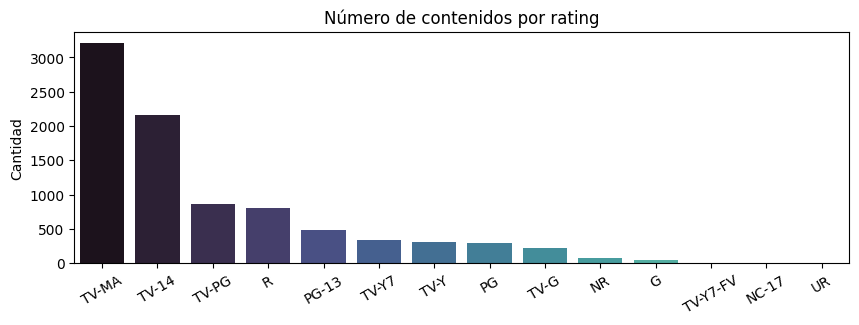

In [7]:
plt.figure(figsize = (10, 3))

sns.barplot(x = 'rating',
            y = 'count',
            data = df_ratings,
            palette='mako')

plt.title('Número de contenidos por rating', fontsize = 12)
plt.xticks(rotation = 30)
plt.xlabel(None)
plt.ylabel('Cantidad')
plt.show()

#### Ejercicio 3: ¿Cuál es el top 10 de países con más títulos disponibles? Deberás:

- Poner nombre a la ejes. 

- Poner título a la gráfica. 

- Rotar las etiquetas del eje X. 



In [8]:
df_countries = df['country'].value_counts().head(10).reset_index()
df_countries

,country,count
0,United States,2818
1,India,972
2,United Kingdom,419
3,Japan,245
4,South Korea,199
5,Canada,181
6,Spain,145
7,France,124
8,Mexico,110
9,Egypt,106


/var/folders/gf/rtshnkx974q994djpf858hv40000gn/T/ipykernel_11810/259676899.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = 'country',


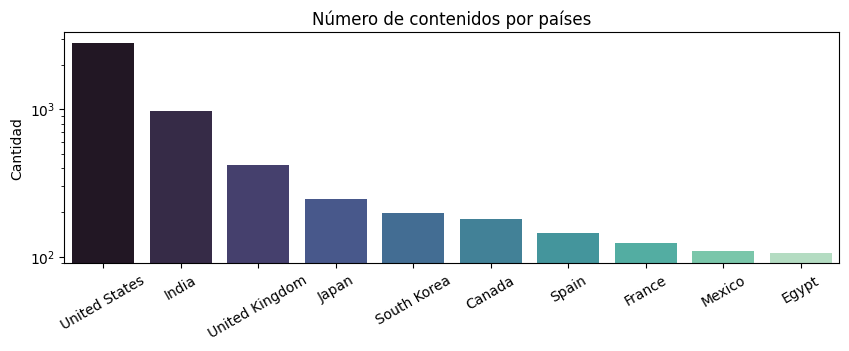

In [9]:
plt.figure(figsize = (10, 3))

sns.barplot(x = 'country',
            y = 'count',
            data = df_countries,
            palette='mako')

plt.title('Número de contenidos por países', fontsize = 12)
plt.xticks(rotation = 30)
plt.xlabel(None)
plt.ylabel('Cantidad')
# Añado una escala logarítmica porque se ve mejor
plt.yscale("log")
plt.show()

#### Ejercicio 5: ¿Cuál es la puntuación promedio de las películas según su calificación? Deberás:


- Poner nombre a la ejes. 

- Poner título a la gráfica. 

- Rotar las etiquetas del eje X. 

- Cambia el tamaño de la gráfica a 15 x 5

In [10]:
filtro_score = df['IMDB Score'].isna() == False

df_score = df_clean[filtro_score].groupby('rating')['IMDB Score'].mean().sort_values(ascending=False).reset_index()

/var/folders/gf/rtshnkx974q994djpf858hv40000gn/T/ipykernel_11810/3760960211.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_score = df_clean[filtro_score].groupby('rating')['IMDB Score'].mean().sort_values(ascending=False).reset_index()


In [11]:
df_score.sample()

,rating,IMDB Score
2,G,6.5


/var/folders/gf/rtshnkx974q994djpf858hv40000gn/T/ipykernel_11810/409105448.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = 'rating',


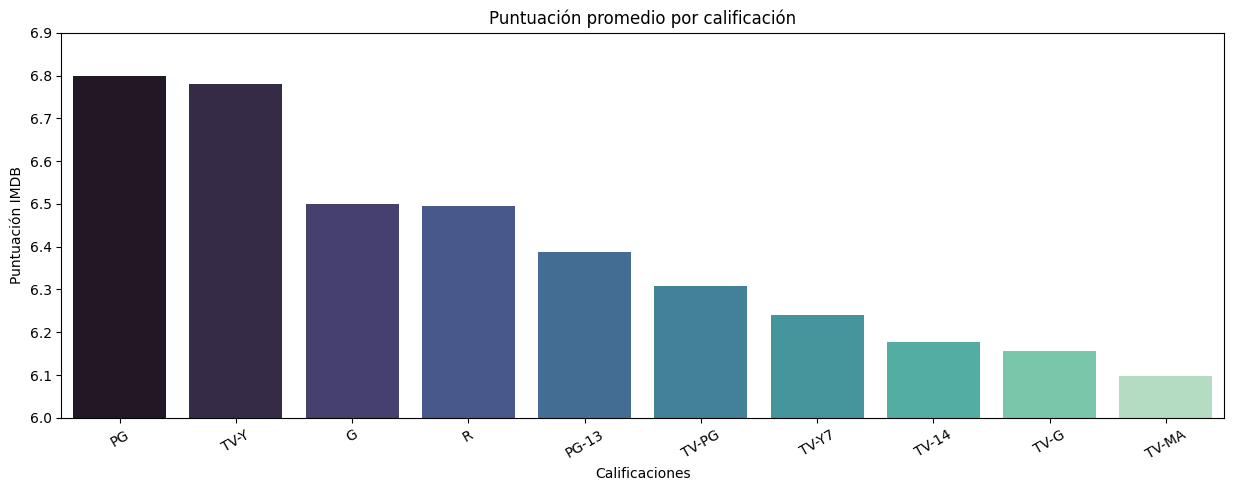

In [12]:
plt.figure(figsize = (15, 5))

sns.barplot(x = 'rating',
            y = 'IMDB Score',
            data = df_score,
            palette='mako')

plt.title('Puntuación promedio por calificación', fontsize = 12)
plt.xticks(rotation = 30)
plt.xlabel('Calificaciones')
plt.ylabel('Puntuación IMDB')
plt.yticks([i/10 for i in range(60, 70)])
plt.ylim((6,6.9))
plt.show()

#### Ejercicio 6: ¿Cuál es la relación entre la duración de las películas y su puntuación en IMDb? Deberás:

- Cambiar el tamaño de los puntos. 

- Poner nombre a la ejes. 

- Poner título a la gráfica. 


In [13]:
filtro_score = df['IMDB Score'].isna() == False
filtro_duracion = df['duration'].isna() == False

df_dur_scor = df[filtro_duracion & filtro_score]
df_dur_scor['duration'] = df_dur_scor['duration'].str.replace(' min', '')
df_dur_scor['duration'] = list(map(float, df_dur_scor['duration']))

/var/folders/gf/rtshnkx974q994djpf858hv40000gn/T/ipykernel_11810/1155892594.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_dur_scor['duration'] = df_dur_scor['duration'].str.replace(' min', '')
/var/folders/gf/rtshnkx974q994djpf858hv40000gn/T/ipykernel_11810/1155892594.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_dur_scor['duration'] = list(map(float, df_dur_scor['duration']))


In [14]:
df_dur_scor['duration'].unique()

array([ 90.,  82., 118.,  73., 148., 140., 107.,  98., 128., 121., 142.,
       143.,  84., 132.,  55., 112., 113.,  81., 120., 119., 138., 127.,
       116.,  32.,  54.,   8.,  71.,   9.,  48., 117.,  83.,  42.,  13.,
       124., 150.,  50., 123., 130., 110.,  47., 126., 104., 122.,  28.,
        20.,  80., 135.,  17.,  41., 133., 156., 149.,   5.,  75.,  16.,
       111.,  85., 145.,  79.,  25., 129., 137., 209.,  40., 141.,  52.,
        22.,  38.,  64.,  10.,  46.,  59.,  30.,  49.,  60.,  26.,  63.,
        74., 153.,  35., 144.,  77.,  12.,  78.,  53., 131.])

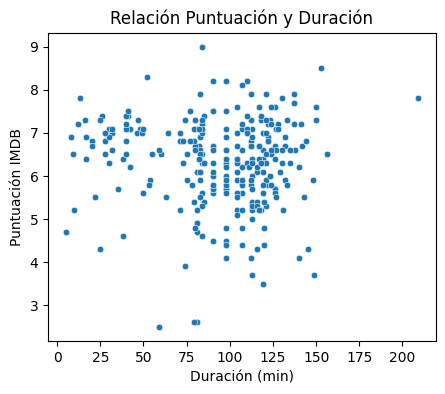

In [15]:
plt.figure(figsize=(5,4))

sns.scatterplot(x = 'duration',
                y = 'IMDB Score',
                data = df_dur_scor,
                s = 22)

plt.title('Relación Puntuación y Duración', fontsize = 12)
plt.xlabel('Duración (min)')
plt.ylabel('Puntuación IMDB')
plt.show()

#### Ejercicio 7: ¿Cómo se distribuye la puntuación en IMDb según los 10 idiomas más usados? Deberás:

- Usa una gráfica que nos muestre la mediana y los cuartiles. 

- Poner nombre a la ejes. 

- Poner título a la gráfica. 

- Rota las etiquetas del eje X. 

In [16]:
idiomas = df['Language'].value_counts().head(10).keys()

df_idiomas = df_clean[df['Language'].isin(idiomas)]

/var/folders/gf/rtshnkx974q994djpf858hv40000gn/T/ipykernel_11810/2047490189.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_idiomas = df_clean[df['Language'].isin(idiomas)]


/var/folders/gf/rtshnkx974q994djpf858hv40000gn/T/ipykernel_11810/4139999.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(order = idiomas,


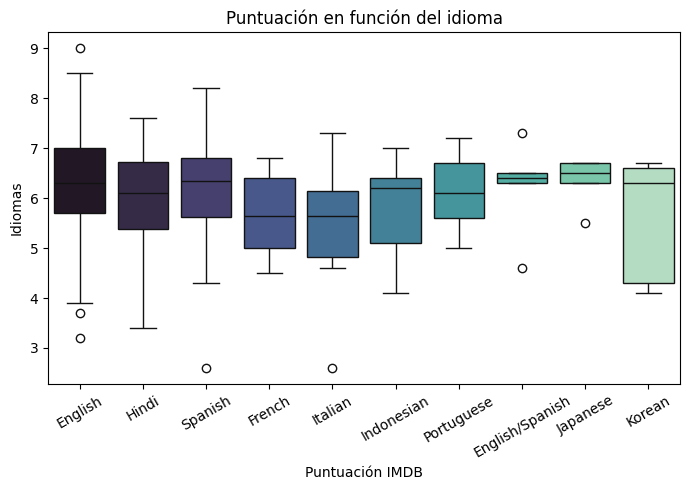

In [17]:
plt.figure(figsize = (7, 5))

sns.boxplot(order = idiomas,
            x = 'Language',
            y = 'IMDB Score',
            data = df_idiomas,
            palette = 'mako'
            )

plt.xticks(rotation = 30)
plt.xlabel('Puntuación IMDB')
plt.ylabel('Idiomas')
plt.title('Puntuación en función del idioma', fontsize = 12)
plt.tight_layout()

#### Ejercicio 8: ¿Cuáles son los 10 directores que tienen las puntuaciones más altas?

- Poner nombre a la ejes. 

- Poner título a la gráfica. 

- Rota las etiquetas del eje X. 

- Cambiar el tamaño de la gráfica. 



In [18]:
filtro_score = df['IMDB Score'].isna() == False

df_director = df_clean[filtro_score].groupby('director')['IMDB Score'].mean().reset_index()

/var/folders/gf/rtshnkx974q994djpf858hv40000gn/T/ipykernel_11810/2142456194.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_director = df_clean[filtro_score].groupby('director')['IMDB Score'].mean().reset_index()


In [19]:
df_director = df_director.sort_values(by = 'IMDB Score', ascending=False).head(10)

/var/folders/gf/rtshnkx974q994djpf858hv40000gn/T/ipykernel_11810/1630785983.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = 'director',


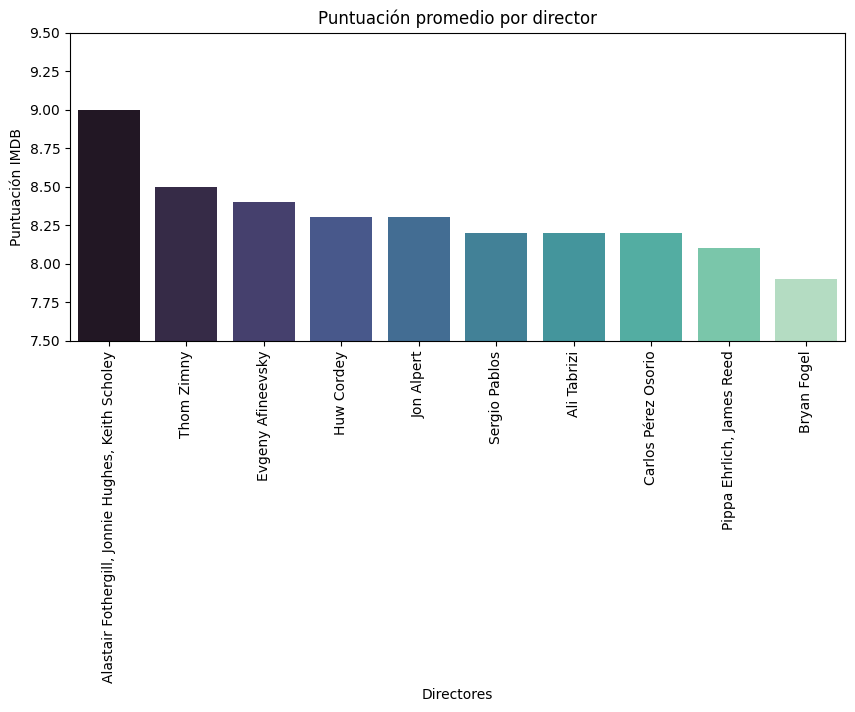

In [20]:
plt.figure(figsize = (10, 4))

sns.barplot(x = 'director',
            y = 'IMDB Score',
            data = df_director,
            palette='mako')

plt.title('Puntuación promedio por director', fontsize = 12)
plt.xticks(rotation = 90)
plt.xlabel('Directores')
plt.ylim(7.5, 9.5)
plt.ylabel('Puntuación IMDB')
plt.show()

#### Ejercicio 9:  ¿Cuál es la distribución de títulos por tipo y calificación? Soluciona este ejercicio usando subplots. Deberás:

- Poner nombre a la ejes. 

- Poner título a la gráfica. 

- Rota las etiquetas del eje X. 


In [21]:
df_rating_count = df_clean['rating'].value_counts().reset_index()

/var/folders/gf/rtshnkx974q994djpf858hv40000gn/T/ipykernel_11810/1409961428.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x = 'type',
/var/folders/gf/rtshnkx974q994djpf858hv40000gn/T/ipykernel_11810/1409961428.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = 'rating',


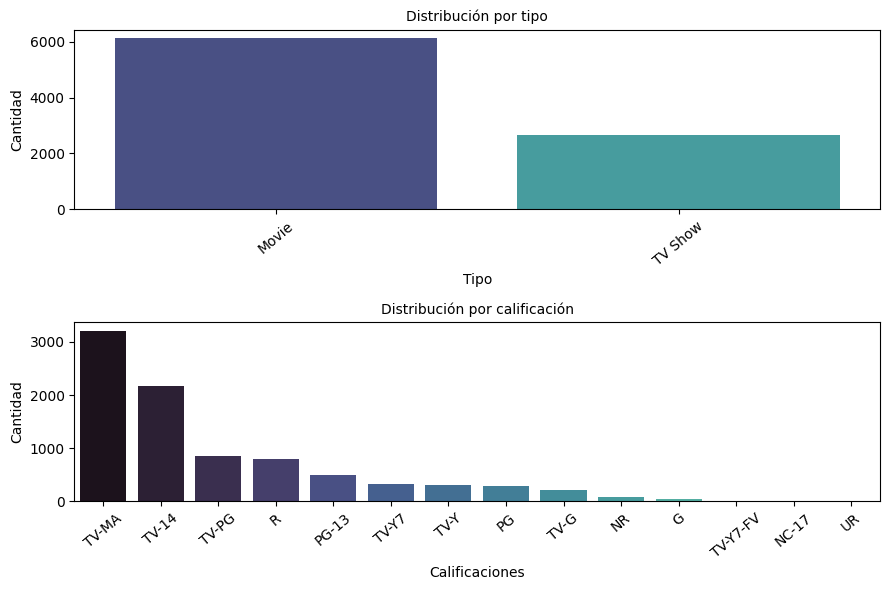

In [22]:
fig, axes = plt.subplots(2, 1, figsize = (9, 6))

sns.countplot(x = 'type',
              data = df_clean,
              palette = 'mako',
              ax = axes[0]
              )

sns.barplot(x = 'rating',
            y = 'count',
            data = df_rating_count,
            palette = 'mako',
            ax = axes[1]
            )

# Primer gráfico
axes[0].set_title("Distribución por tipo", fontsize = 10)
axes[0].set_xlabel("Tipo", fontsize = 10)
axes[0].set_ylabel("Cantidad", fontsize = 10)
axes[0].tick_params(axis = 'x',labelrotation = 40)

# Segundo gráfico
axes[1].set_title("Distribución por calificación", fontsize = 10)
axes[1].set_xlabel("Calificaciones", fontsize = 10)
axes[1].set_ylabel("Cantidad", fontsize = 10)
axes[1].tick_params(axis = 'x',labelrotation = 40)

plt.tight_layout()

#### Ejercicio 10: ¿Cómo se distribuyen los títulos por país para los 6 principales países? Tienes que crear una gráfica para cada país mostrando los resultados en un subplot. Deberás: 

- Poner nombre a la ejes. 

- Poner título a la gráfica. 

- Rota las etiquetas del eje X. 



Tenemos que sacar el numero de pelis y series (el tipo) para los 6 principales paises, mostrando cada pais en un subplot.

In [23]:
paises = df_clean['country'].value_counts().head(6).keys()

In [24]:
paises

Index(['United States', 'India', 'United Kingdom', 'Japan', 'South Korea',
       'Canada'],
      dtype='object', name='country')

/var/folders/gf/rtshnkx974q994djpf858hv40000gn/T/ipykernel_11810/243007810.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x = 'type',
/var/folders/gf/rtshnkx974q994djpf858hv40000gn/T/ipykernel_11810/243007810.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x = 'type',
/var/folders/gf/rtshnkx974q994djpf858hv40000gn/T/ipykernel_11810/243007810.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x = 'type',
/var/folders/gf/rtshnkx974q994djpf858hv40000gn/T/ipykernel_11810/243007810.py:5: FutureWarning: 

Passing `palette` without 

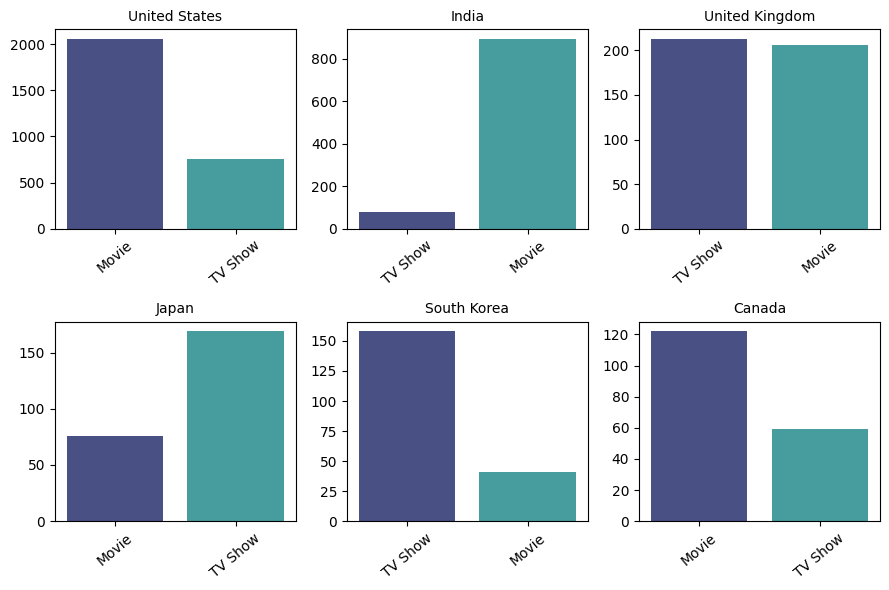

In [25]:
fig, axes = plt.subplots(2, 3, figsize = (9, 6))

for i in range(6):

    sns.countplot(x = 'type',
                  data = df[df['country'] == paises[i]],
                  palette = 'mako',
                  ax = axes.flat[i]
                  )
    
    axes.flat[i].set_title(f"{paises[i]}", fontsize = 10)
    axes.flat[i].set_xlabel(None)
    axes.flat[i].set_ylabel(None)
    axes.flat[i].tick_params(axis = 'x',labelrotation = 40)

plt.tight_layout()

#### Ejercicio 11: ¿Cuál es total de tipos de calificaciones, considerando solo los principales 5 países? Deberás:

- Poner nombre a la ejes. 

- Poner título a la gráfica. 

- Rota las etiquetas del eje X. 

In [26]:
df_top5 = df['country'].value_counts().head().reset_index()
df_top5 = df_clean[df_clean['country'].isin(df_top5['country'].values)]

# Número de valores únicos
df_categorias = df_top5.groupby('country')['rating'].nunique().reset_index()

df_categorias

,country,rating
0,India,11
1,Japan,8
2,South Korea,7
3,United Kingdom,10
4,United States,14


/var/folders/gf/rtshnkx974q994djpf858hv40000gn/T/ipykernel_11810/2121309594.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = 'country',


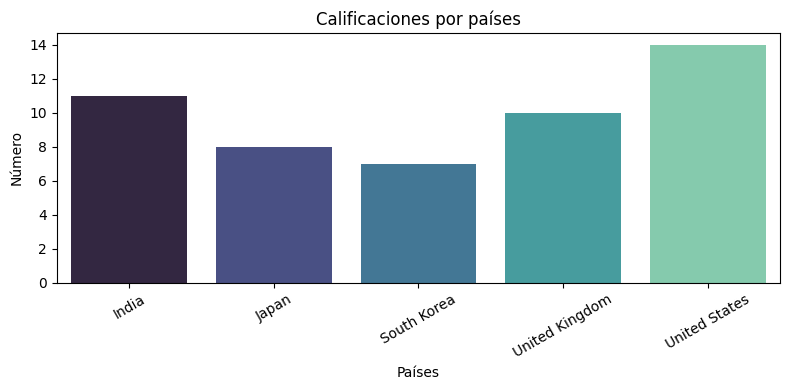

In [27]:
plt.figure(figsize = (8, 4))

sns.barplot(x = 'country',
            y = 'rating',
            data = df_categorias,
            palette='mako')

plt.title('Calificaciones por países')
plt.xticks(rotation = 30)
plt.xlabel('Países')
plt.ylabel('Número')
plt.tight_layout()

#### Ejercicio 12: ¿Cómo se distribuyen las 5 primeras calificaciones  a lo largo de los aúltimo 10 años? 

- Poner nombre a la ejes. 

- Poner título a la gráfica. 

- Rota las etiquetas del eje X. 

- Elimina el nombre del eje X. 

In [52]:
# Filtro años
last_year = df_clean['release_year'].max()
filtro_year = df_clean['release_year'].between(last_year - 9, last_year)
# filtro ratings
ratings = df_clean['rating'].value_counts().head().keys()
filtro_rating = df_clean['rating'].isin(ratings)

df_year = df_clean[filtro_year & filtro_rating].groupby(['rating', 'release_year'])['title'].count().reset_index(name='count')

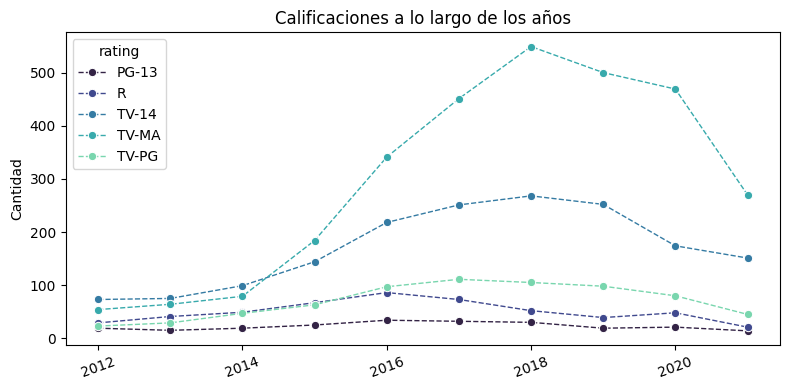

In [53]:
plt.figure(figsize=(8, 4))

sns.lineplot(x = 'release_year',
             y = 'count',
             hue = 'rating',
             marker = 'o',
             linestyle = 'dashed',
             linewidth = 1,
             errorbar= None,
             palette='mako',
             data = df_year)

plt.xlabel(None)
plt.ylabel('Cantidad')
plt.title('Calificaciones a lo largo de los años')
plt.xticks(rotation = 20)

plt.tight_layout()


### BONUS

#### Ejercicio 13: ¿Cómo ha evolucionado la cantidad de títulos añadidos a lo largo de los años diferenciando entre Películas y Series?

- Poner nombre a la ejes. 

- Poner título a la gráfica. 

- Rota las etiquetas del eje X. 

- Elimina el nombre del eje X. 

- Añade una *grid* al gráfico. 

In [30]:
df_clean['year_added'] = (pd.to_datetime(df['date_added'].str.strip(), format='%B %d, %Y')).dt.year

/var/folders/gf/rtshnkx974q994djpf858hv40000gn/T/ipykernel_11810/1784615970.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['year_added'] = (pd.to_datetime(df['date_added'].str.strip(), format='%B %d, %Y')).dt.year


In [33]:
df_titulos_ad = df_clean.groupby(['type', 'year_added'])['title'].count().reset_index(name = 'count')

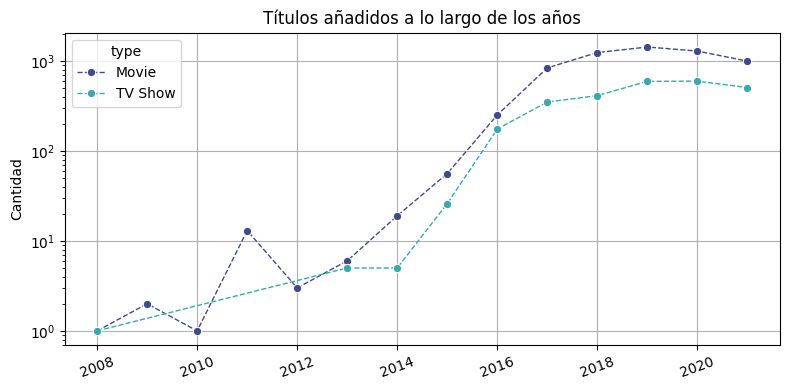

In [39]:
plt.figure(figsize=(8, 4))

sns.lineplot(x = 'year_added',
             y = 'count',
             hue = 'type',
             marker = 'o',
             linestyle = 'dashed',
             linewidth = 1,
             errorbar= None,
             palette='mako',
             data = df_titulos_ad)

plt.xlabel(None)
plt.ylabel('Cantidad')
plt.title('Títulos añadidos a lo largo de los años')
plt.xticks(rotation = 20)
plt.grid()

# Añado una escala logarítmica porque se ve mejor
plt.yscale("log")
plt.tight_layout()

#### Ejercicio 14: ¿Cómo se distribuyen los títulos según su calificación (rating)? Utiliza un gráfico de “quesitos” para visualizar la proporción de títulos en cada categoría de calificación.

In [45]:
df_rating_pie = df_clean.groupby(['rating'])['title'].count().reset_index(name='count')

df_rating_pie

,rating,count
0,G,41
1,NC-17,3
2,NR,80
3,PG,287
4,PG-13,490
5,R,799
6,TV-14,2160
7,TV-G,220
8,TV-MA,3207
9,TV-PG,863


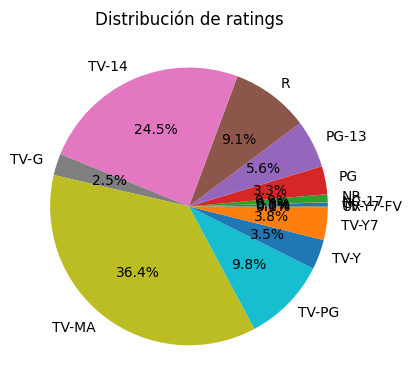

In [57]:
plt.figure(figsize=(8, 4))

plt.pie("count", labels= "rating",
        data = df_rating_pie, 
        autopct=  '%1.1f%%')

plt.title('Distribución de ratings')
plt.tight_layout()

#### Ejercicio 15: ¿Cómo se distribuyen los títulos según su calificación (rating) y tipo (Películas vs Series)? Utiliza un gráfico countplot con el parámetro hue para diferenciar entre películas y series en cada calificación.

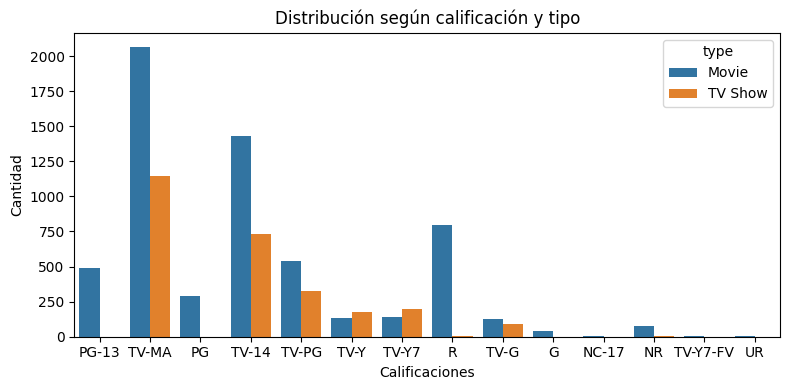

In [43]:
plt.figure(figsize=(8, 4))

sns.countplot(x="rating", 
              hue="type",
              data = df_clean)


plt.title('Distribución según calificación y tipo')
plt.xlabel('Calificaciones')
plt.ylabel('Cantidad')
plt.tight_layout()